In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm



/Users/dorkyegg/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# random forests are an ensemble learner of smaller/simpler decision trees

# makes random data for use
from sklearn.datasets import make_blobs

In [3]:
# 125 data points per center
# random state is the random seed for reproducing tests
X,Y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

In [14]:
# get to know your data
print("type of X and Y are", type(X), " and ", type(Y)," respectively")
print("size of X = ",X.shape,"\nsize of Y = ",Y.shape)

type of X and Y are <class 'numpy.ndarray'>  and  <class 'numpy.ndarray'>  respectively
size of X =  (500, 2) 
size of Y =  (500,)


In [11]:
Y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3, 3,
       2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3, 1, 3,
       0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0, 1, 0, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3, 0, 3, 0, 1, 0,
       0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 1, 1, 3,
       3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3, 2, 0, 3, 2, 3, 3, 1,
       0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2, 3, 3, 0, 1, 2, 3, 2, 0,
       1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1, 0, 3, 1, 0, 2, 0, 1, 2, 3, 0,
       1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2, 2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1,
       0, 3, 3, 0, 1, 2, 0, 0, 0, 2, 3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3,
       0, 3,

In [10]:
X

array([[  8.031223  ,   1.07684647],
       [  0.79275323,  -8.49270872],
       [ -6.24741713,  -2.80979462],
       [  7.1350517 ,  -0.27620621],
       [  8.75371186,  12.16955042],
       [ -6.52850085,  -4.81571386],
       [ -5.68423308,  -8.6536682 ],
       [ -4.40557029, -10.14011553],
       [ -7.18713979,  -8.49782188],
       [  7.67125718,  15.33780796],
       [  7.05472091,   2.71136019],
       [ -6.44972594,  -8.50218035],
       [  7.3175591 ,   8.07104895],
       [  9.435827  ,  12.60240072],
       [ -3.94302873,  -8.45858333],
       [ -5.82070544, -11.54252584],
       [  5.45439833,  10.04943649],
       [  1.23496178,  -4.95053236],
       [  0.99142387,  -0.34084278],
       [ -4.89204127,  -6.95668615],
       [  6.09686891,   6.03480565],
       [ -0.70549841,  -3.44748449],
       [ -0.18012153,  -2.11546643],
       [ -3.20156642, -10.44698102],
       [  0.95069301,  -2.56593727],
       [ -0.75648703,   0.73537406],
       [ -0.74705664,   1.54560469],
 

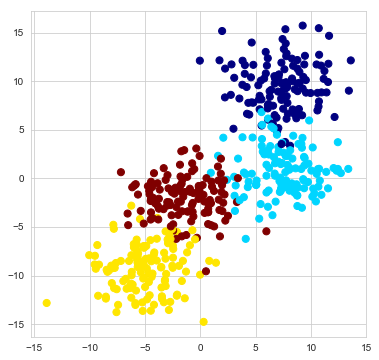

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='jet')

# observation, should see 4 blobs of roughly similar spread since using the same stddev

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
def visualize_tree(classifier, X, Y, boundaries=True, xlim=None, ylim=None):
    # helps visualize a decision tree, outputs a meshgrid
    
    classifier.fit(X,Y)
    
    # set x and y limites
    if xlim is None:
        xlim = (X[:,0].min() - 0.1, X[:,0].max() + 0.1)
    if ylim is None:
        ylim = (X[:,1].min() - 0.1, X[:,1].max() + 0.1)
        
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    # create meshgrid
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    # define Z by predictions then reshape based on meshgrid
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the figure
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # plot the training points also
    plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap = 'jet')
    
    # set plot limits
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    def plot_boundaries(i, xlim, ylim):
        # plotting the decision boundaries
        
        if i < 0:
            return
        
        tree = classifier.tree_
        
        # recursively go through nodes of tree to plot boundaries
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                           [xlim[0], tree.threshold[i]],
                            ylim)
            plot_boundaries(tree.children_right[i],
                           [tree.threshold[i], xlim[1]],
                            ylim)
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                           xlim,
                            [ylim[0],tree.threshold[i]])
            plot_boundaries(tree.children_right[i],
                            xlim,
                           [tree.threshold[i], ylim[1]])
            
    # random forest -vs- single tree
    if boundaries:

        plot_boundaries(0,plt.xlim(), plt.ylim())

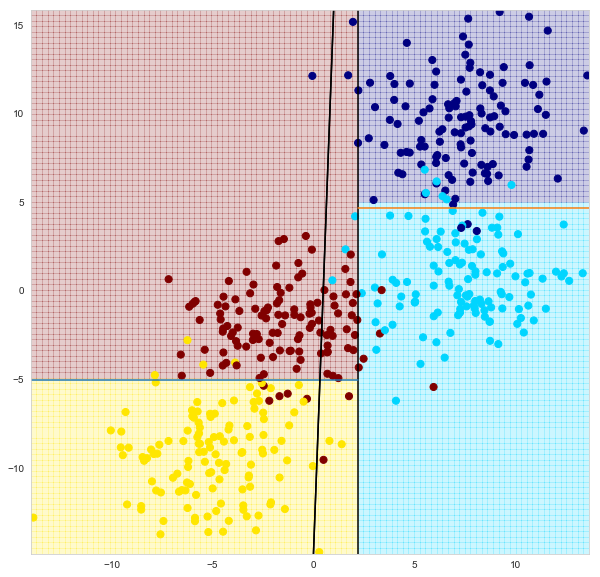

In [19]:
# the meshgrid with ravel xx/yy helps color-code each region
clf = DecisionTreeClassifier(max_depth=2, random_state = 0)
visualize_tree(clf,X,Y)

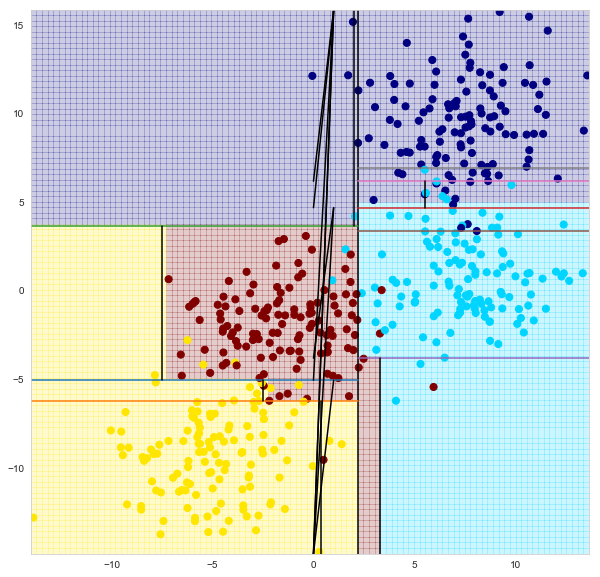

In [20]:
# lets change the max_depth and redraw
clf2 = DecisionTreeClassifier(max_depth=4, random_state = 0)
visualize_tree(clf2,X,Y)

# observation - overfitting now happening

## IMPORTANT POINT <<----
# this is where ensemble comes into play, to avoid overfitting (analogous to 'wisdom of crowd')

In [21]:
from sklearn.ensemble import RandomForestClassifier

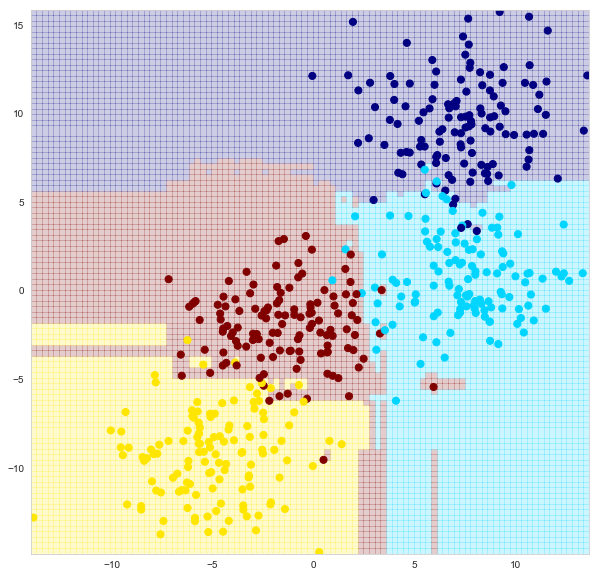

In [22]:
# n_estimators ~ how many decision trees to incorporate
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf_rf,X,Y,boundaries=False)

In [23]:
# now lets study random forest regression
# weather data is a good input - let's simulate some with this sin_model function below

In [53]:
# rand not to be confused with randn, defines the range of random variables
x = 10 * np.random.rand(100)

In [54]:
def sin_model(x,sigma=0.2):
    noise = sigma * np.random.randn(len(x))
    return np.sin(5.0 * x) + np.sin(0.5 * x) + noise

In [55]:
y = sin_model(x)

<Container object of 3 artists>

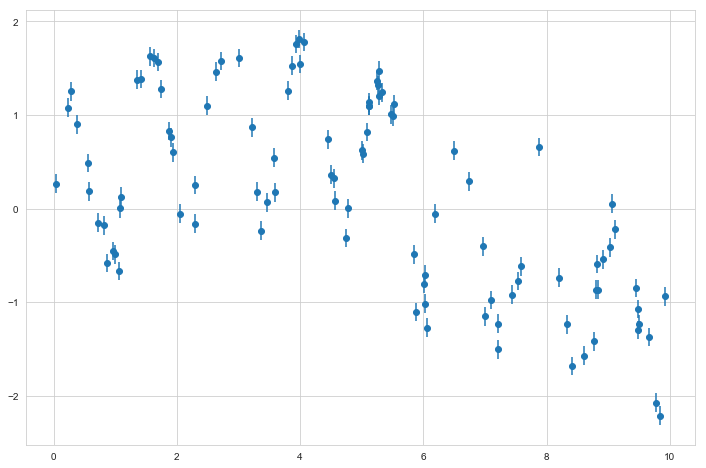

In [56]:
plt.figure(figsize=(12,8))
plt.errorbar(x,y,0.1,fmt='o')

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
xfit = np.linspace(0,10,1000)

In [59]:
# lets regress the data against 1000 newly generated points
rfr = RandomForestRegressor(100)

# need to structure X term correctly
rfr.fit(x[:,None],y)

yfit = rfr.predict(xfit[:,None])

In [60]:
# create the model's actual figures
ytrue = sin_model(xfit,0)

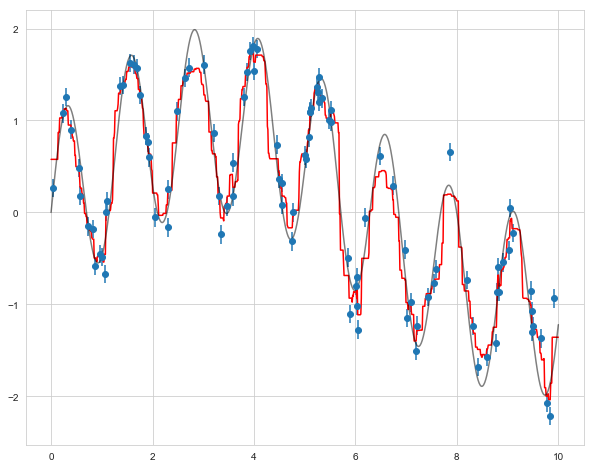

In [61]:
plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.1,fmt='o')
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k',alpha=0.5)